In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titles.csv')
data.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
data.isnull().sum()

title    1
year     0
dtype: int64

In [4]:
data.title.fillna(data.title.mode()[0],inplace=True)

In [5]:
data.isnull().sum()

title    0
year     0
dtype: int64

In [6]:
data1=pd.read_csv('cast.csv')
data1.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:
data1.isnull().sum()

title             2
year              0
name              0
type              0
character         5
n            407926
dtype: int64

In [8]:
data1.title.fillna(data1.title.mode()[0], inplace=True)

In [9]:
data1.character.fillna(data1.character.mode()[0],inplace=True)

In [10]:
data1.n.fillna(data1.n.mean(), inplace=True)

In [11]:
data1.isnull().sum()

title        0
year         0
name         0
type         0
character    0
n            0
dtype: int64

In [12]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1048575.0,1985.960278,28.656819,1894.0,1963.0,1997.000000,2010.000000,2023.0
n,1048575.0,16.515828,16.484757,1.0,8.0,16.515828,16.515828,999.0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,230621.0,1985.695097,29.371587,1894.0,1966.0,1995.0,2011.0,2026.0


In [14]:
data.mode()

,title,year
0,Hamlet,2016


### What are the ten most common movie names of all time?

In [15]:
title_counts=data['title'].value_counts()
title_counts.head(10)

title
Hamlet                  19
Carmen                  16
Macbeth                 15
The Outsider            12
The Three Musketeers    11
Othello                 11
Freedom                 11
Kismet                  11
Temptation              11
Maya                    11
Name: count, dtype: int64

### Which three years of the 1930s saw the most films released?

In [36]:
data_1930s = data[(data['year'] >= 1930) & (data['year'] <= 1939)]


year_counts = data_1930s['year'].value_counts()


top_3_years = year_counts.head(3)

print(f" Top three years of the 1930s saw the most films released : {top_3_years} ")



 Top three years of the 1930s saw the most films released : year
1937    1194
1936    1139
1938    1127
Name: count, dtype: int64 


### Plot the number of films that have been released each decade over the history of cinema.

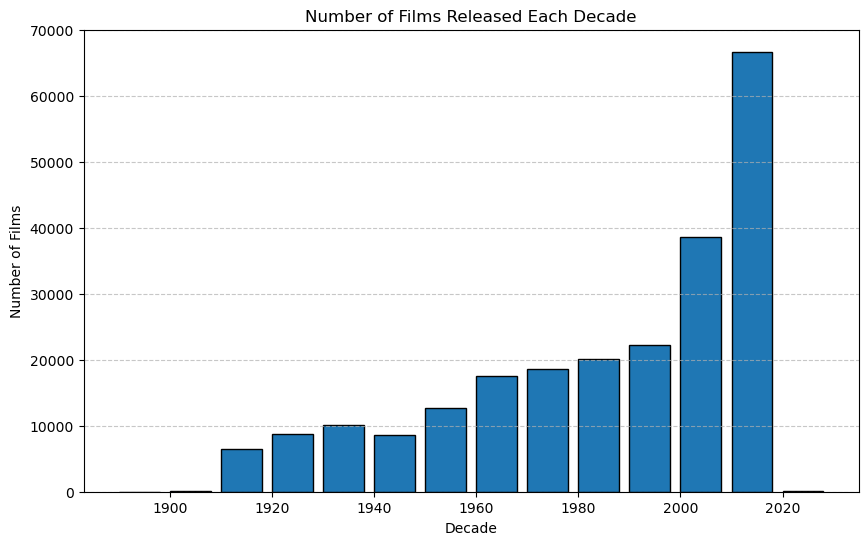

In [17]:
data['decade'] = (data['year'] // 10) * 10


decade_counts = data['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, align='edge', edgecolor='black')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Plot the number of "Hamlet" films made each decade.

C:\Users\ABS\AppData\Local\Temp\ipykernel_76\1935529088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_data['Decade'] = (hamlet_data['year'] // 10) * 10


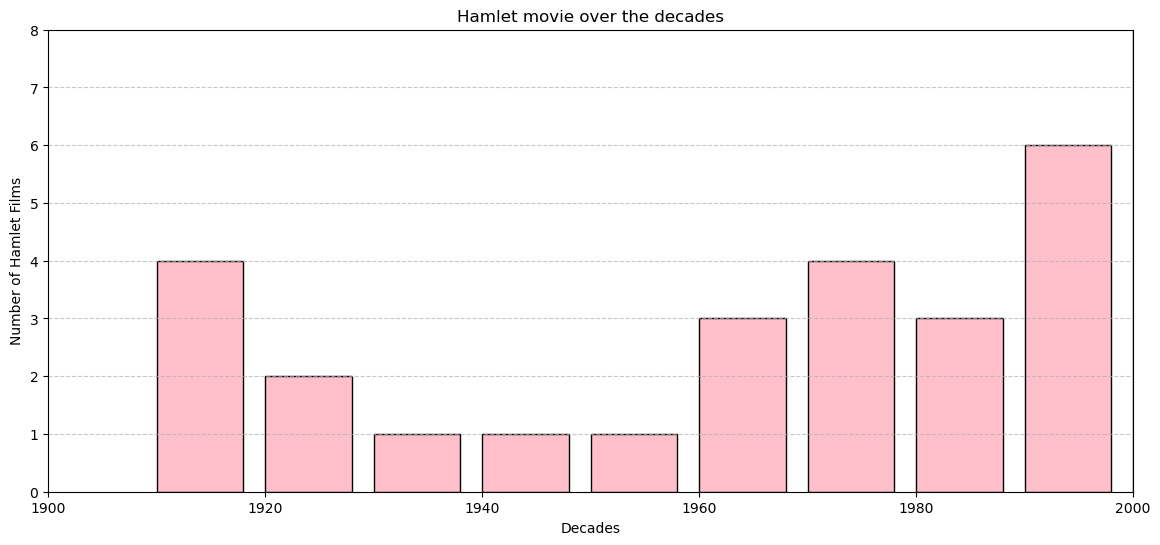

In [18]:
hamlet_data = data[data['title'].str.contains('Hamlet',case=False)]

hamlet_data['Decade'] = (hamlet_data['year'] // 10) * 10
decade_counts = hamlet_data['Decade'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, align='edge', edgecolor='black',color='pink') 
plt.xlim(1900, 2000)
plt.ylim(0, 8)
plt.xlabel('Decades')
plt.ylabel('Number of Hamlet Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Hamlet movie over the decades')
plt.show()



### Plot the number of "Rustler" characters in each decade of the history of film.

C:\Users\ABS\AppData\Local\Temp\ipykernel_76\3163533042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rustler_data['Decade'] = (data1['year'] // 10) * 10


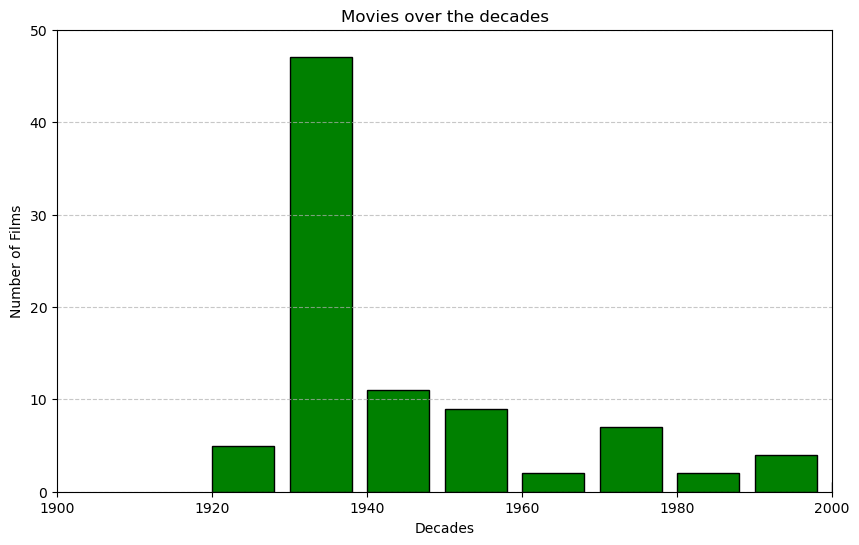

In [19]:
Rustler_data = data1[data1['character'].str.contains('Rustler',case=False)]
Rustler_data['Decade'] = (data1['year'] // 10) * 10


decade_counts = Rustler_data['Decade'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, align='edge', edgecolor='black',color='green') 
plt.xlim(1900, 2000)
plt.ylim(0, 50)
plt.xlabel('Decades')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Movies over the decades')
plt.show()

### Plot the number of "Hamlet" characters each decade.

C:\Users\ABS\AppData\Local\Temp\ipykernel_76\442652095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_data['Decade'] = (hamlet_data['year'] // 10) * 10


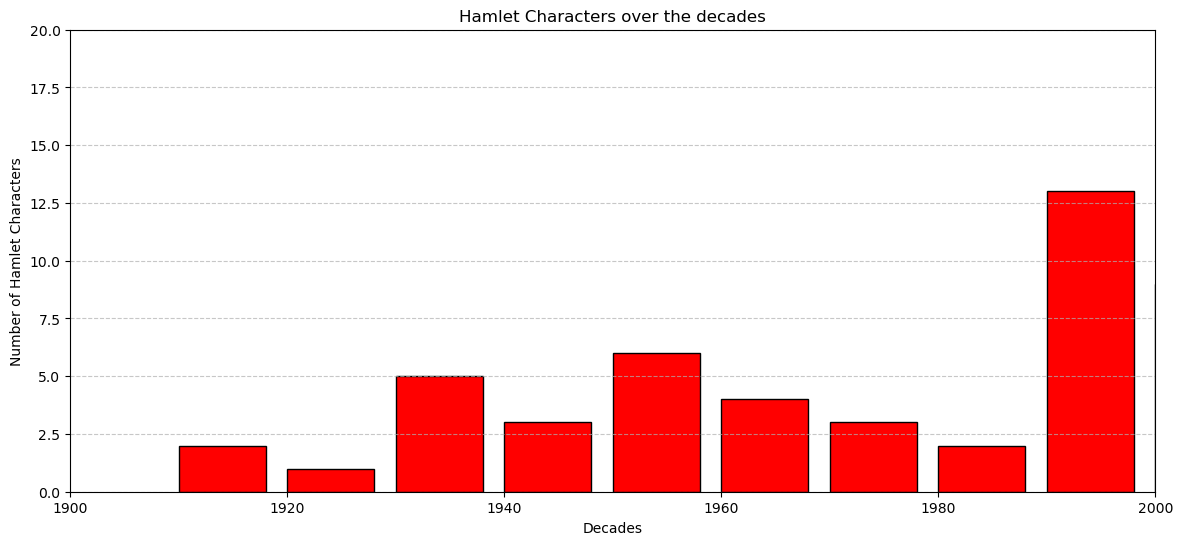

In [20]:
hamlet_data = data1[data1['character'].str.contains('Hamlet', case=False)]

hamlet_data['Decade'] = (hamlet_data['year'] // 10) * 10
decade_counts = hamlet_data['Decade'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, align='edge', edgecolor='black',color='red') 
plt.xlim(1900, 2000)
plt.ylim(0, 20)
plt.xlabel('Decades')
plt.ylabel('Number of Hamlet Characters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Hamlet Characters over the decades')
plt.show()


### What are the 11 most common character names in movie history?

In [21]:
data1.character.value_counts()

character
Himself                  8443
Policeman                3043
Doctor                   2799
Extra                    2765
Reporter                 2692
                         ... 
Secretari de Ll?ria         1
Sargento G. Civil           1
Empleado de editorial       1
Cura Militar                1
B?b? Yvan naissant          1
Name: count, Length: 517309, dtype: int64

In [22]:
character_counts = data1['character'].value_counts()

top_11_characters = character_counts.head(11)

print("The 11 most common character names in movie history:")
print(top_11_characters)


The 11 most common character names in movie history:
character
Himself        8443
Policeman      3043
Doctor         2799
Extra          2765
Reporter       2692
Townsman       2634
Bartender      2414
Waiter         2296
Henchman       2140
Dancer         2002
Party Guest    1905
Name: count, dtype: int64


### Who are the 10 people most often credited as "Herself" in film history?

In [23]:
herself_data=data1[data1['character'].str.contains('Herself',case=False)]

herself_counts=herself_data['name'].value_counts()

top10_herself_counts=herself_counts.head(10)

print("The 10 people most often credited as Herself in movie history:")
print(top10_herself_counts)

The 10 people most often credited as Herself in movie history:
name
Etta Baker         1
Jeff (II) Grace    1
Aleli Estrada      1
Zilia Estrada      1
Sharon A. Fox      1
Erwan Frazier      1
Gwen Garcia        1
Gulcin Gilbert     1
Megan Grandall     1
Ren? Biaggi        1
Name: count, dtype: int64


### Who are the 10 people most often credited as "Himself" in film history?

In [24]:
himself_data=data1[data1['character'].str.contains('Himself',case=False)]

himself_counts=himself_data['name'].value_counts()

top10_himself_counts=himself_counts.head(10)

print("The 10 people most often credited as Himself in movie history:")
print(top10_himself_counts)

The 10 people most often credited as Himself in movie history:
name
Adolf Hitler            115
Winston Churchill        27
George W. Bush           26
Bill Clinton             22
Amitabh Bachchan         22
Muhammad Ali             19
Billy Graham             16
Jimmy Carter             16
Dwight D. Eisenhower     15
Walter Cronkite          15
Name: count, dtype: int64


### Which actors or actresses appeared in the most movies in the year 1945?

In [25]:
actors_1945=data1[data1['year']==1945]

most_appeared_counts=actors_1945['name'].value_counts()

most_appeared_actors=most_appeared_counts.head(1)

print(" Most appeared actors in the most movies in the year 1945:")
print(most_appeared_actors)



 Most appeared actors in the most movies in the year 1945:
name
Sam (II) Harris    32
Name: count, dtype: int64


### Which actors or actresses appeared in the most movies in the year 1985?

In [26]:
actors_1985=data1[data1['year']==1985]

most_appeared_counts=actors_1985['name'].value_counts()

most_appeared_actors_1985=most_appeared_counts.head(1)

print(" Most appeared actors in the most movies in the year 1985:")

print(most_appeared_actors_1985)


 Most appeared actors in the most movies in the year 1985:
name
Raj Babbar    15
Name: count, dtype: int64


### Plot how many roles Mammootty has played in each year of his career.

Mammooty Roles over the years :
 year
1982    1
1991    1
1992    1
Name: character, dtype: int64


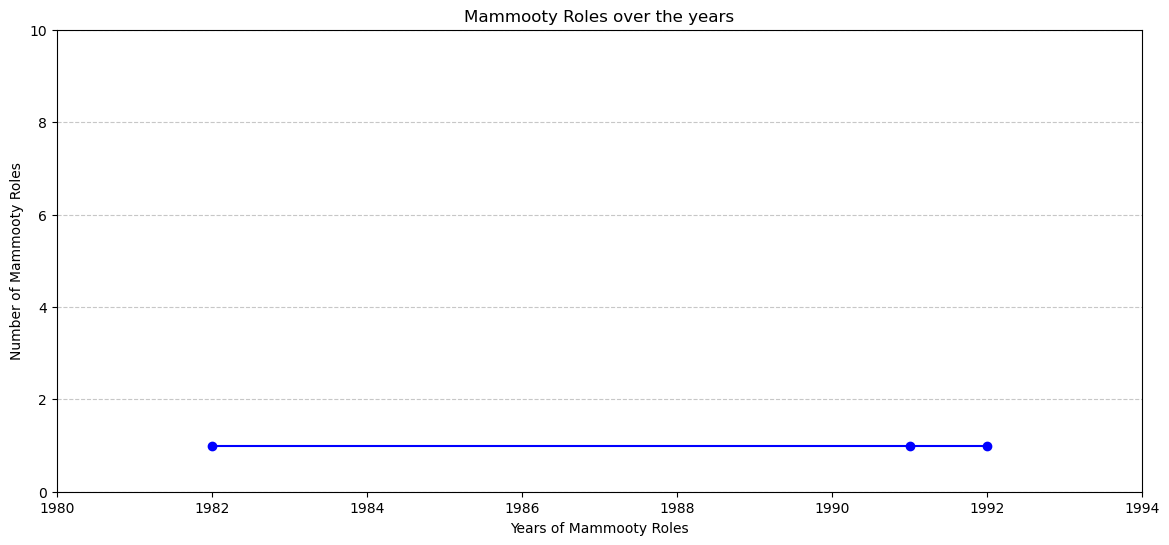

In [27]:
mammooty_roles=data1[data1['character'].str.contains('Mammootty',case=False)]

mammooty_roles_in_years=mammooty_roles.groupby('year')['character'].count()

print(f'Mammooty Roles over the years :\n {mammooty_roles_in_years}')
plt.figure(figsize=(14, 6))
plt.plot(mammooty_roles_in_years.index,mammooty_roles_in_years.values, marker='o', linestyle='-', color='blue') 
plt.xlim(1980, 1994)
plt.ylim(0, 10)
plt.xlabel('Years of Mammooty Roles')
plt.ylabel('Number of Mammooty Roles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Mammooty Roles over the years')
plt.show()



### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [28]:
frequent_roles=data1[data1['character'].str.startswith('Patron in')]

frequent_roles_count=frequent_roles['name'].value_counts()

top_10_frequent_roles_patron=frequent_roles_count.head(10)

print(" 10 Most frequent roles that start with the phrase Patron in")

print(top_10_frequent_roles_patron)


 10 Most frequent roles that start with the phrase Patron in
name
Ralph Ahn              1
Anthony Akins          1
Clark Howat            1
Benn Heselev           1
Dennis Hedlund         1
Stuart Greene          1
Albert Godderis        1
Shawn (II) Flanagan    1
Marshall Factora       1
Arthur Dulac           1
Name: count, dtype: int64


### What are the 10 most frequent roles that start with the word "Science"?

In [29]:
frequent_roles=data1[data1['character'].str.startswith('Science')]

frequent_roles_count=frequent_roles['name'].value_counts()

top_10_frequent_roles_science=frequent_roles_count.head(10)

print(" 10 Most frequent roles that start with the phrase Science :")

print(top_10_frequent_roles_science)

 10 Most frequent roles that start with the phrase Science :
name
Matthew T. Adams    1
Brian Copping       1
Joe (III) Cronin    1
Zach Cumer          1
Christoph Dade      1
Michael Decker      1
John (II) Denn      1
Santana Draper      1
Gregg Edelman       1
Jeffrey Emrich      1
Name: count, dtype: int64


### Plot the n-values of the roles that Judi Dench has played over her career.

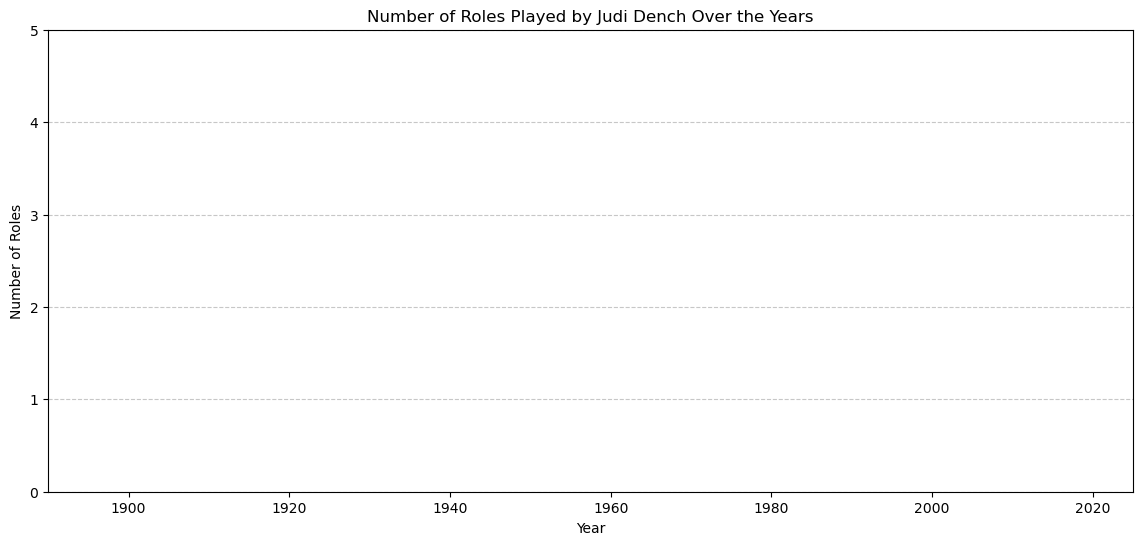

In [30]:
judi_dench = data1[(data1['name'] == 'Judi Dench') & (data1['n'].notna())]

judi_years = judi_dench.groupby('year')['n'].count()

plt.figure(figsize=(14, 6))
plt.plot(judi_years.index, judi_years.values, marker='o', linestyle='-', color='red') 
plt.xlim(1890,2025 )
plt.ylim(0,5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Number of Roles Played by Judi Dench Over the Years')
plt.show()


### Plot the n-values of Cary Grant's roles through his career.

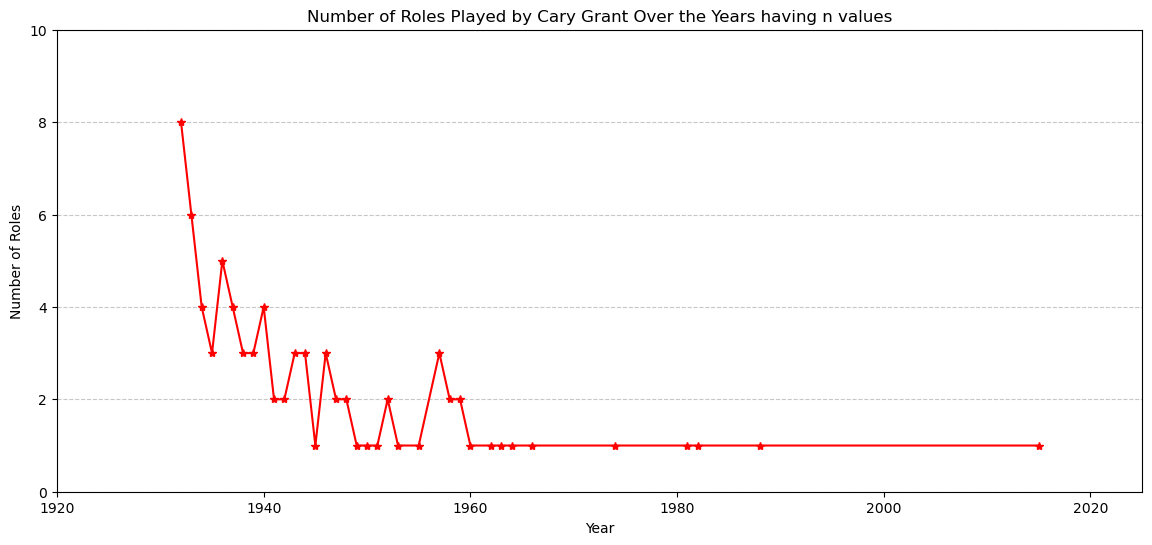

In [31]:
Cary_Grant = data1[(data1['name'] == 'Cary Grant') & (data1['n'].notna())]

Cary_Grant_years = Cary_Grant.groupby('year')['n'].count()

plt.figure(figsize=(14, 6))
plt.plot(Cary_Grant_years.index, Cary_Grant_years.values, marker='*', linestyle='-', color='red') 
plt.xlim(1920,2025 )
plt.ylim(0,10)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Number of Roles Played by Cary Grant Over the Years having n values')
plt.show()


### Plot the n-value of the roles that Sidney Poitier has acted over the years.

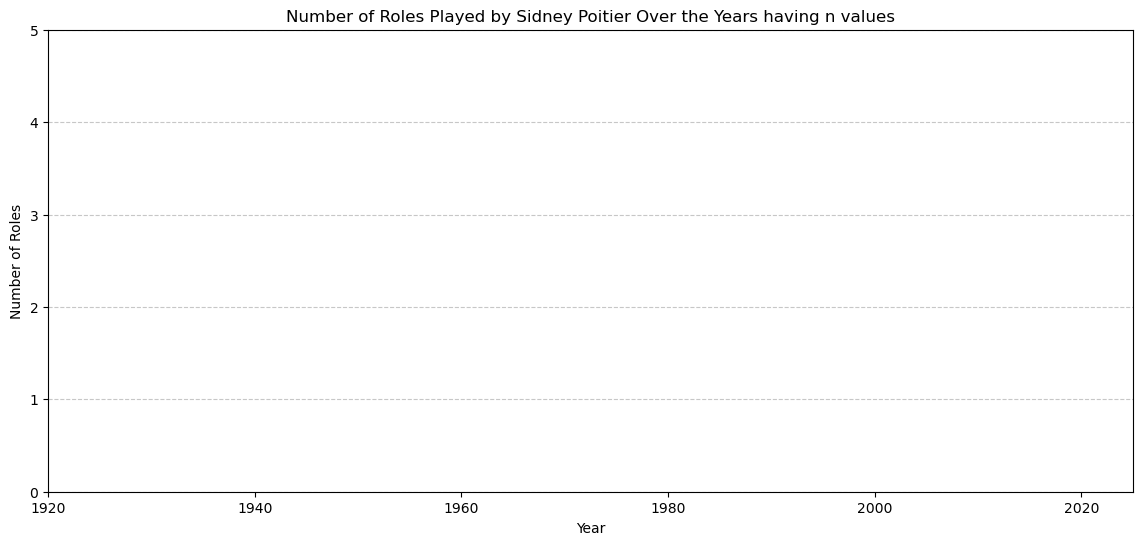

In [32]:
Sidney_Poitier = data1[(data1['name'] == 'Sidney Poitier') & (data1['n'].notna())]

Sidney_Poitier_years = Sidney_Poitier.groupby('year')['n'].count()

plt.figure(figsize=(14, 6))
plt.scatter(Sidney_Poitier_years.index, Sidney_Poitier_years.values, marker='o', linestyle='-', color='orange') 
plt.xlim(1920,2025)
plt.ylim(0,5)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Number of Roles Played by Sidney Poitier Over the Years having n values')
plt.show()

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [33]:
roles_1950s = data1[(data1['year'] >= 1950) & (data1['year'] <= 1959) & (data1['n'] == 1) & (data1['type']=='actor')]


leading_roles_actors = roles_1950s.groupby('type')['n'].count()


print("Number of leading roles (n=1) in the 1950s:")
print(leading_roles_actors)


Number of leading roles (n=1) in the 1950s:
type
actor    2926
Name: n, dtype: int64


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [34]:
roles_1950s = data1[(data1['year'] >= 1950) & (data1['year'] <= 1959) & (data1['n'] == 2) & (data1['type']=='actor')]


leading_roles_actors = roles_1950s.groupby('type')['n'].count()


print("Number of supporting roles (n=2) in the 1950s:")
print(leading_roles_actors)



Number of supporting roles (n=2) in the 1950s:
type
actor    2080
Name: n, dtype: int64
